<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>DataFrame Pandas;</li>
  <li>Selecão e Filtros;</li>
  <li>Inserção, Deleção e Atualização.</li>
</ol>

---

# **Exercícios**

## 1\. Fortune 500

O [Fortune 500](https://fortune.com/fortune500/2021/search/) é uma ranking anual compilado pela revista Fortune das 500 maiores empresas dos EUA. 

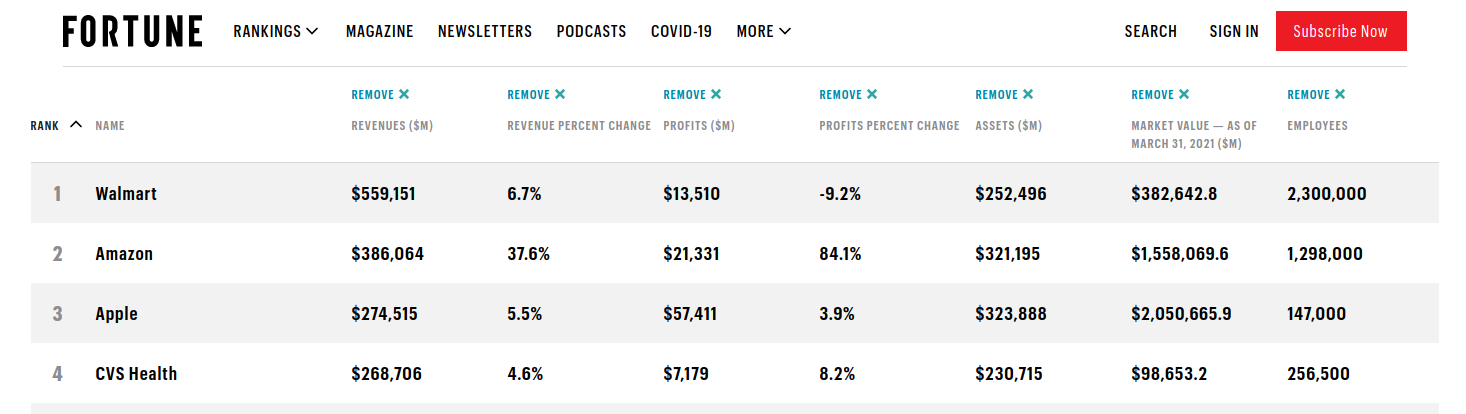

O arquivo `fortune.html` contem o código fonte em HTML da página com as 100 primeiras empresas do ranking. **Carregue-o na máquina virtual do Google Colab**.

Utilize o pacote Python `beautifulsoup4` para extrair todas as 100 empresas do arquivo `fortune.html` providenciado. Salve os dados extraidos no arquivo `fortune.csv` separado por `;`. Exemplo das três primeiras linhas (sem o cabeçalho):

```
1;Walmart;$559,151;6.7%;$13,510;-9.2%;$252,496;$382,642.8;2,300,000
2;Amazon;$386,064;37.6%;$21,331;84.1%;$321,195;$1,558,069.6;1,298,000
3;Apple;$274,515;5.5%;$57,411;3.9%;$323,888;$2,050,665.9;147,000
```

**Dica**: Utilize os código abaixo para ajudar na extração dos dados.

**Dica**: Você não precisa extrair o cabeçalho da tabela, utilize o nome das colunas armazenados na variável `header` abaixo.

<!DOCTYPE html>
<!-- saved from url=(0051)https://fortune.com/fortune500/2021/search?rank=asc -->
<html lang="en" class=""><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script async="" src="./fortune_files/analytics.js"></script><script src="./fortune_files/f.txt"></script><script type="text/javascript" src="./fortune_files/queryly.v4.min.js" defer="" id="queryly-v4"></script><script type="text/javascript" async="" src="./fortune_files/user.js"></script><script src="./fortune_files/osd.js"></script><script type="text/javascript" async="" src="./fortune_files/lightbox_speed.js"></script>
    
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <link rel="shortcut icon" href="https://content.fortune.com/wp-content/uploads/2020/02/favicon_144.ico">
    <!-- @todo perhaps make GTM ID an env var instead of a setting, use here instead of hard-coding. -->

    <!-- 3rd party dns-prefetching -->
    <link rel="preconnect" 
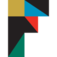
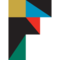
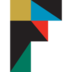
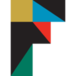
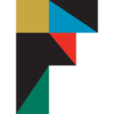
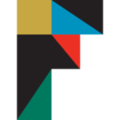
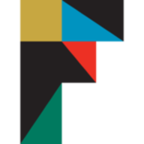
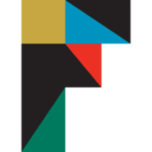
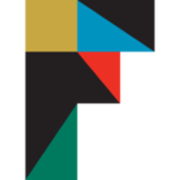
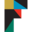
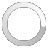

In [1]:
import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://static.lms.ebaconline.com.br/content-files/ac039186-bc3a-42ae-af69-e1ffeb6e5233/original.html'
try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  conteudo = resposta.text
print(conteudo)

In [2]:
import requests
from requests.exceptions import HTTPError
def crawl_website(url: str) -> str:
  try:
    resposta = requests.get(url)
    resposta.raise_for_status()
  except HTTPError as exc:
   print(exc)
  else:
    return resposta.text

In [3]:
URL = 'https://static.lms.ebaconline.com.br/content-files/ac039186-bc3a-42ae-af69-e1ffeb6e5233/original.html'
conteudo = crawl_website(url=URL)
with open(file='fortune.html', mode='w', encoding='utf8') as arquivo:
   arquivo.write(conteudo)

In [10]:
# ler o arquivo fortune.html

from bs4 import BeautifulSoup

pagina = BeautifulSoup(open('fortune.html', mode='r'), 'html.parser')

In [11]:
# extrair as linhas da tabela

tabela = pagina.find('div', {'class': 'rt-table'})
linhas = tabela.find('div', {'class': 'rt-tbody'})

In [13]:
# extrair o conteudo das linhas da tabela
conteudo=[]
for linha in linhas:
    colunas = linha.find('div', {'role': 'row'})
    conteudo.append(colunas.get_text(';').split(';')) # adiciona o conteudo na lista conteudo
  #print(colunas.get_text(';').split(';')) Código do professor
print(conteudo) 
  
 # continue o codigo aqui

[['1', 'Walmart', '$559,151', '6.7%', '$13,510', '-9.2%', '$252,496', '$382,642.8', '2,300,000'], ['2', 'Amazon', '$386,064', '37.6%', '$21,331', '84.1%', '$321,195', '$1,558,069.6', '1,298,000'], ['3', 'Apple', '$274,515', '5.5%', '$57,411', '3.9%', '$323,888', '$2,050,665.9', '147,000'], ['4', 'CVS Health', '$268,706', '4.6%', '$7,179', '8.2%', '$230,715', '$98,653.2', '256,500'], ['5', 'UnitedHealth Group', '$257,141', '6.2%', '$15,403', '11.3%', '$197,289', '$351,725', '330,000'], ['6', 'Berkshire Hathaway', '$245,510', '-3.6%', '$42,521', '-47.8%', '$873,729', '$587,823', '360,000'], ['7', 'McKesson', '$231,051', '7.8%', '$900', '2547.1%', '$61,247', '$31,044', '70,000'], ['8', 'AmerisourceBergen', '$189,893.9', '5.7%', '$-3,408.7', '-498.5%', '$44,274.8', '$24,169.7', '21,500'], ['9', 'Alphabet', '$182,527', '12.8%', '$40,269', '17.3%', '$319,616', '$1,392,561.8', '135,301'], ['10', 'Exxon Mobil', '$181,502', '-31.5%', '$-22,440', '-256.5%', '$332,750', '$236,355.4', '72,000'], [

In [14]:
# escrever o conteudo extraido no arquivo fortune.csv
# utilize a variavel header para construir a o cabecalho do arquivo csv

header = [
  'rank', 
  'name', 
  'revenues', 
  'revenues-percent-change', 
  'profits', 
  'profits-percent-change', 
  'assets', 
  'market-value',
  'employees'
]
import csv
with open(file='./fortune.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerows(
   [header] + conteudo) # Aqui achei que ia funcionar mas deu erro "Não foi possível encontrar o arquivo fortune.csv no back-end".

---

## 2\. Data Wrangling

### **2.1. Criando o DataFrame** 

Crie o dataframe Pandas na variável `fortune_df` através da leitura do arquivo `fortune.csv`

In [15]:
import pandas as pd
fortune_df = fortune_df = pd.read_csv('fortune.csv')

### **2.2. Explorando o DataFrame** 

Utilizando os métodos vistos em aula, explore o dataframe.

 - Liste as 10 primeiras linhas do dataframe:

In [22]:
fortune_df.head(n=10)

,rank,name,revenues,revenues-percent-change,profits,profits-percent-change,assets,market-value,employees
0,1,Walmart,559.151,6.7,13.510,-9.2,252.496,382.642.8,2.300.000
1,2,Amazon,386.064,37.6,21.331,84.1,321.195,1.558.069.6,1.298.000
2,3,Apple,274.515,5.5,57.411,3.9,323.888,2.050.665.9,147.000
3,4,CVS Health,268.706,4.6,7.179,8.2,230.715,98.653.2,256.500
4,5,UnitedHealth Group,257.141,6.2,15.403,11.3,197.289,351.725,330.000
5,6,Berkshire Hathaway,245.510,-3.6,42.521,-47.8,873.729,587.823,360.000
6,7,McKesson,231.051,7.8,900,2547.1,61.247,31.044,70.000
7,8,AmerisourceBergen,189.893.9,5.7,-3.408.7,-498.5,44.274.8,24.169.7,21.500
8,9,Alphabet,182.527,12.8,40.269,17.3,319.616,1.392.561.8,135.301
9,10,Exxon Mobil,181.502,-31.5,-22.440,-256.5,332.750,236.355.4,72.000


 - Liste os tipos de dados armazenados na coluna do dataframe:

In [17]:
fortune_df.dtypes

rank                        int64
name                       object
revenues                   object
revenues-percent-change    object
profits                    object
profits-percent-change     object
assets                     object
market-value               object
employees                  object
dtype: object

 - Liste o numero de linhas e colunas do dataframe:

In [18]:
fortune_df.shape

(100, 9)

### **2.3. Limpando o DataFrame** 

Grande parte das colunas numéricas (exceto a coluna `ranking` e `employees`) possuem o caracter `$` ou `%` que as classificam com o tipo `object` (ou `str` do Python) ao invés do tipo correto como `int` ou `float`. Utilizando os métodos de atualizam, remova os caracteres das linhas das colunas numéricas.


In [20]:
#Méto replace para remover os caracteres "$", "%" e ","

fortune_df['revenues'] = fortune_df['revenues'].apply(lambda revenues: revenues.replace('$','').replace(',','.') if '$' in revenues else revenues)
fortune_df['profits'] = fortune_df['profits'].apply(lambda profits: profits.replace('$','').replace(',','.') if '$' in profits else profits)
fortune_df['assets'] = fortune_df['assets'].apply(lambda assets: assets.replace('$','').replace(',','.') if '$' in assets else assets)
fortune_df['employees'] = fortune_df['employees'].apply(lambda employees: employees.replace('$','').replace(',','.') if '$' in employees else employees)
fortune_df['revenues-percent-change'] = fortune_df['revenues-percent-change'].apply(lambda x: x.replace('%','').replace(',','.') if '%' in x else x)
fortune_df['profits-percent-change'] = fortune_df['profits-percent-change'].apply(lambda x: x.replace('%','') if '%' in x else x)
fortune_df['market-value'] = fortune_df['market-value'].apply(lambda x: x.replace('$','').replace(',','.') if '$' in x else x)
fortune_df['employees'] = fortune_df['employees'].apply(lambda employees: employees.replace(',','.') if ',' in employees else employees)

**Dica**: Você pode utilizar qualquer método de atualização, eu recomendo o uso do método `apply`.

### **2.4. Salvando o DataFrame** 

Utilize o método `to_csv` para salvar o dataframe `fortune_df` no arquivo `fortune-limpo.csv`.


In [21]:
fortune_df.to_csv("fortune-limpo.csv.", index= False)

**Dica**: Confira a documentação oficial do método `to_csv` neste [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html).

---